In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from plotnine import *

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

from sklearn.cluster import DBSCAN


from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt


%matplotlib inline

# DBSCAN with Multiple Data Sets

Read [here](https://www.aaai.org/Papers/KDD/1996/KDD96-037.pdf) if math excites you.

## Dataset 1

In [ ]:
d1 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KMEM1.csv")

d1.head()



,x,y
0,1.206087,1.847686
1,0.351919,0.245691
2,1.201688,0.630774
3,0.733710,1.364328
4,1.150745,0.724892


In [ ]:
# dbscan and plot
dbscan = DBSCAN()
labels = dbscan.fit_predict(d1)

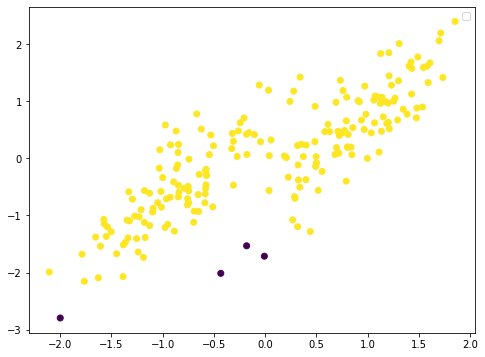

In [ ]:
plt.figure(figsize= (8,6))
plt.scatter(d1.iloc[:,0], d1.iloc[:,1], c = labels )
plt.legend()
plt.show()

In [ ]:
silhouette_score(d1, labels)

0.24825776725141807

In [ ]:
dbscan = DBSCAN(eps = 0.4, min_samples = 7)
labels = dbscan.fit_predict(d1)
silhouette_score(d1, labels)

0.2923915423791819

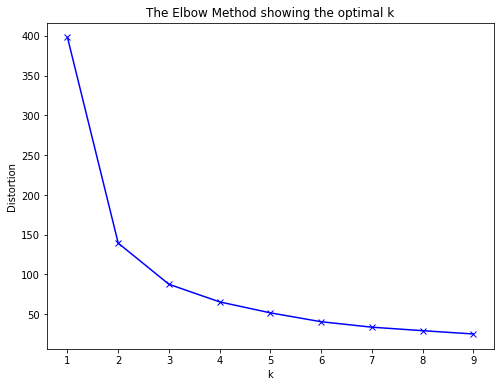

In [ ]:
distortions = []
K = range(1,10)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(d1)
    distortions.append(kmeans.inertia_)

plt.figure(figsize=(8,6))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [ ]:
# grab only clustered data points
kmeans = KMeans()
labels = kmeans.fit_predict(d1)
silhouette_score(d1, labels)

0.41348278356643886

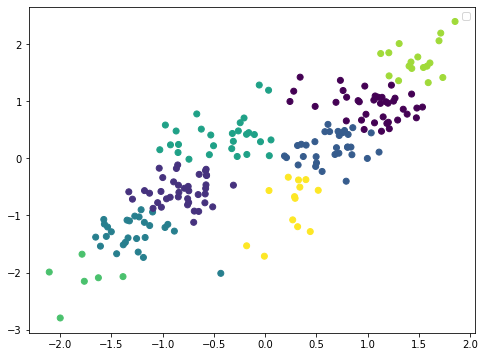

In [ ]:
plt.figure(figsize= (8,6))
plt.scatter(d1.iloc[:,0], d1.iloc[:,1], c = labels )
plt.legend()
plt.show()

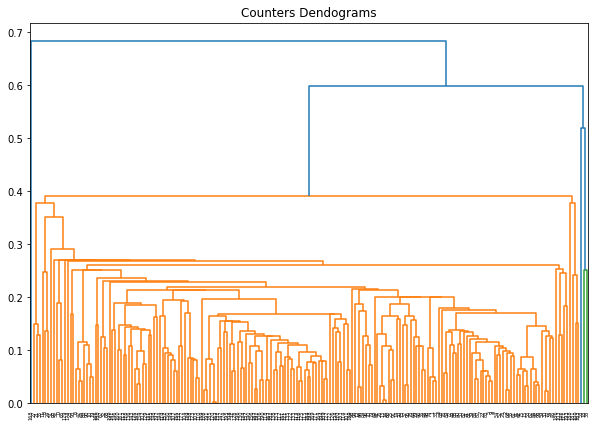

In [ ]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Counters Dendograms")
dend = shc.dendrogram(shc.linkage(y=d1 , method = 'single',metric= 'euclidean'),orientation='top') #fill y with your dataframe
                                                                                      #and method with linkage criteria
                                                                                      #and metric with distance function

In [ ]:
from sklearn.cluster import AgglomerativeClustering

ward = AgglomerativeClustering(n_clusters=3)
ward_pred = ward.fit_predict(d1)

# Hierarchical clustering using complete linkage
complete = AgglomerativeClustering(n_clusters=3, linkage = 'complete')
complete_pred = complete.fit_predict(d1)

# Hierarchical clustering using average linkage
avg = AgglomerativeClustering(n_clusters=3, linkage = 'average')
avg_pred = avg.fit_predict(d1)

In [ ]:
print(silhouette_score(d1, ward_pred))
print(silhouette_score(d1, complete_pred))
print(silhouette_score(d1, avg_pred))

0.41567707625984956
0.43725020321573393
0.3919547821963116


The best model is Hierarchical clustering (complete)

In [ ]:
scaler = StandardScaler()
d1_std = scaler.fit_transform(d1)

In [ ]:
complete_pred = complete.fit_predict(d1_std)
print(silhouette_score(d1, complete_pred))

0.43725020321573393


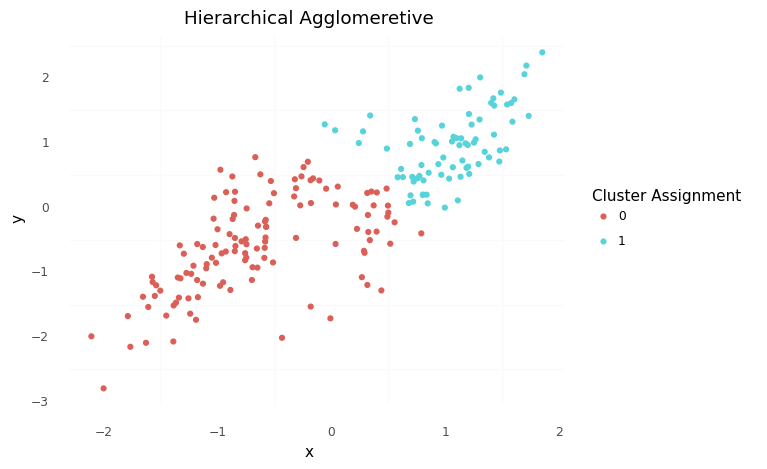

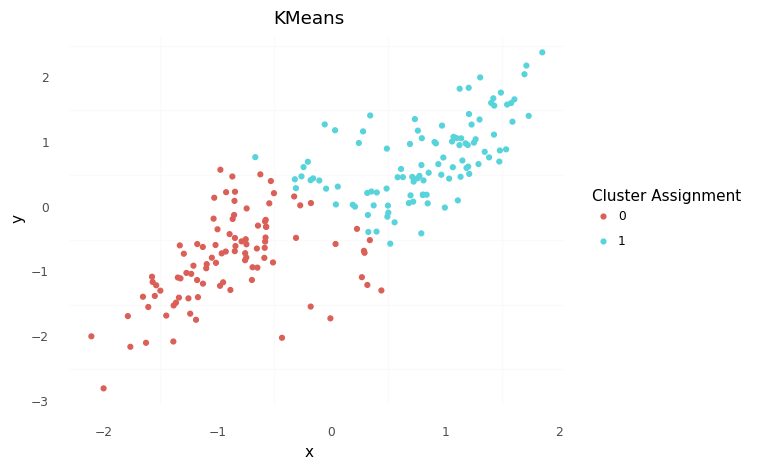

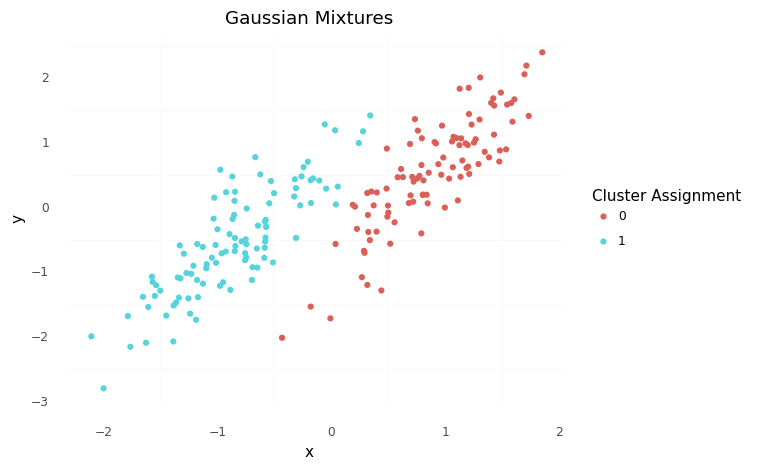

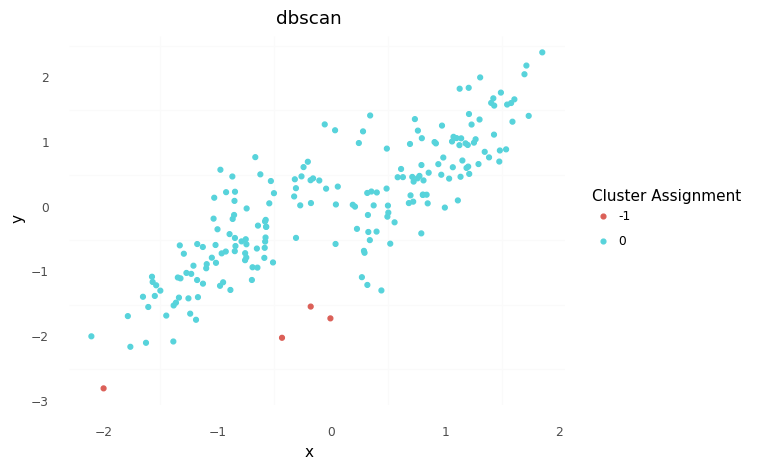

In [ ]:
# overall 
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

hac = AgglomerativeClustering(2)
km = KMeans(2)
gm = GaussianMixture(2)
dbscan = DBSCAN()

hac.fit(d1[["x","y"]])
km.fit(d1[["x","y"]])
gm.fit(d1[["x","y"]])


d1["hac"] = hac.labels_
d1["km"] = km.labels_
d1["gm"] = gm.predict(d1[["x","y"]])
d1["dbscan"] = dbscan.fit_predict(d1[["x","y"]])


print(ggplot(d1, aes(x = "x", y = "y",
                    color = "factor(hac)")) +
             geom_point() +
             theme_minimal() +
             scale_color_discrete(name = "Cluster Assignment") +
             theme(panel_grid_major = element_blank()) + 
             labs(title = "Hierarchical Agglomeretive"))


print(ggplot(d1, aes(x = "x", y = "y",
                    color = "factor(km)")) +
             geom_point() +
             theme_minimal() +
             scale_color_discrete(name = "Cluster Assignment") +
             theme(panel_grid_major = element_blank()) + 
             labs(title = "KMeans"))


print(ggplot(d1, aes(x = "x", y = "y",
                    color = "factor(gm)")) +
             geom_point() +
             theme_minimal() +
             scale_color_discrete(name = "Cluster Assignment") +
             theme(panel_grid_major = element_blank()) + 
             labs(title = "Gaussian Mixtures"))


print(ggplot(d1, aes(x = "x", y = "y",
                    color = "factor(dbscan)")) +
             geom_point() +
             theme_minimal() +
             scale_color_discrete(name = "Cluster Assignment") +
             theme(panel_grid_major = element_blank()) + 
             labs(title = "dbscan"))

In [ ]:
print("The silhouette_score for Gaussian is", silhouette_score(d1, gm.predict(d1[["x","y"]])))

The silhouette_score for Gaussian is 0.501819193592762


The best model is Gaussian with score 0.501819193592762

## Dataset 2

In [ ]:
d2 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KMEM2.csv")

In [ ]:
d2.head()

,x,y
count,3.000000e+02,3.000000e+02
mean,6.631732e-16,-3.079019e-16
std,1.000000e+00,1.000000e+00
min,-1.954443e+00,-2.443577e+00
25%,-8.023357e-01,-8.532077e-01
50%,-3.227060e-01,7.610679e-02
75%,9.424262e-01,8.135723e-01
max,2.336756e+00,2.388957e+00


In [ ]:
d2_std = scaler.fit_transform(d2)

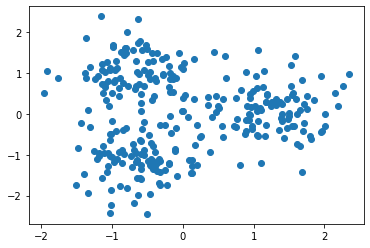

In [ ]:
plt.scatter(d2_std[:,0], d2_std[:,1])

In [ ]:
# dbscan and plot
dbscan = DBSCAN(eps = 0.3, min_samples= 7)
labels = dbscan.fit_predict(d2_std)

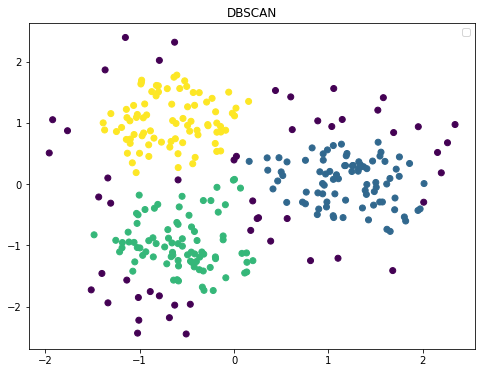

In [ ]:
plt.figure(figsize= (8,6))
plt.scatter(d2_std[:,0], d2_std[:,1], c = labels )
plt.legend()
plt.title('DBSCAN')
plt.show()

In [ ]:
silhouette_score(d2_std, labels)

0.4251592765066629

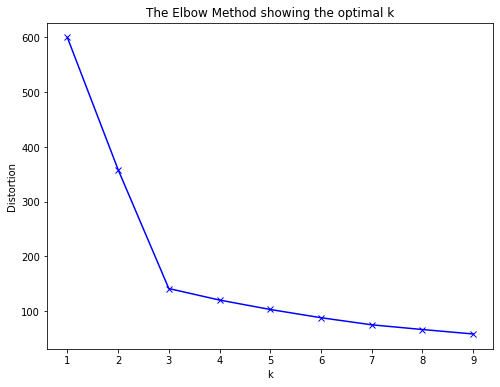

In [ ]:
distortions = []
K = range(1,10)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(d2_std)
    distortions.append(kmeans.inertia_)

plt.figure(figsize=(8,6))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [ ]:
# grab only clustered data points
kmeans = KMeans(3)
labels = kmeans.fit_predict(d2_std)
silhouette_score(d2_std, labels)

0.558315766313531

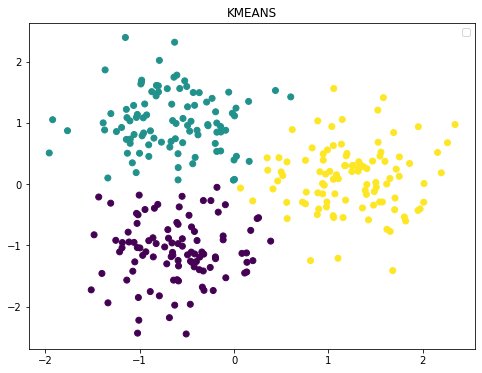

In [ ]:
plt.figure(figsize= (8,6))
plt.scatter(d2_std[:,0], d2_std[:,1], c = labels )
plt.legend()
plt.title('KMEANS')
plt.show()

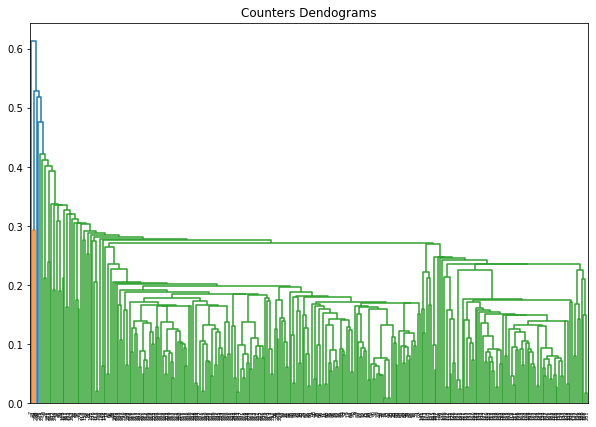

In [ ]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Counters Dendograms")
dend = shc.dendrogram(shc.linkage(y=d2_std , method = 'single',metric= 'euclidean'),orientation='top') #fill y with your dataframe
                                                                                      #and method with linkage criteria
                                                                                      #and metric with distance function

In [ ]:
from sklearn.cluster import AgglomerativeClustering

ward = AgglomerativeClustering(n_clusters=3)
ward_pred = ward.fit_predict(d2_std)

# Hierarchical clustering using complete linkage
complete = AgglomerativeClustering(n_clusters=3, linkage = 'complete')
complete_pred = complete.fit_predict(d2_std)

# Hierarchical clustering using average linkage
avg = AgglomerativeClustering(n_clusters=3, linkage = 'average')
avg_pred = avg.fit_predict(d2_std)

print(silhouette_score(d2_std, ward_pred))
print(silhouette_score(d2_std, complete_pred))
print(silhouette_score(d2_std, avg_pred))

0.5331004784160975
0.4891409315667258
0.5536705240804661


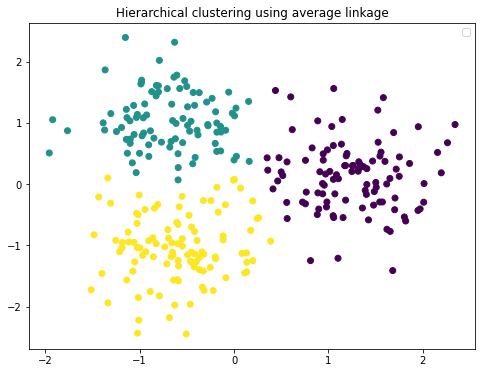

In [ ]:
plt.figure(figsize= (8,6))
plt.scatter(d2_std[:,0], d2_std[:,1], c = avg_pred )
plt.legend()
plt.title('Hierarchical clustering using average linkage')
plt.show()

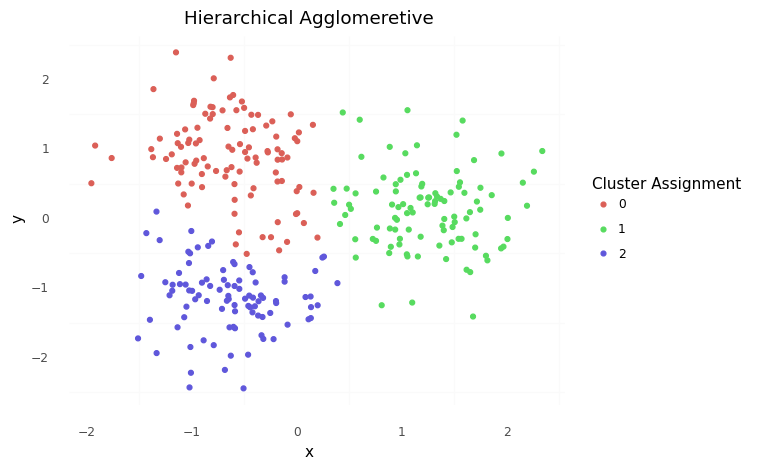

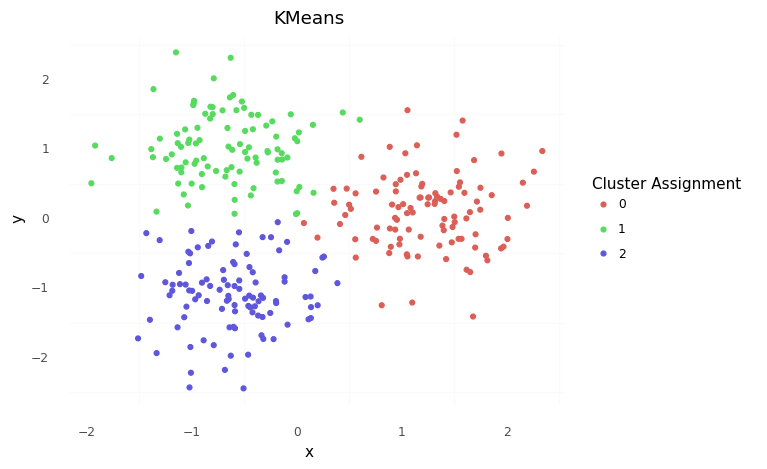

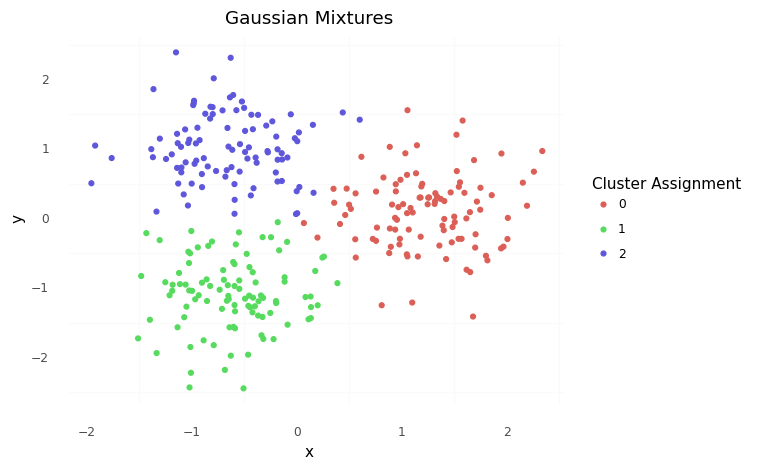

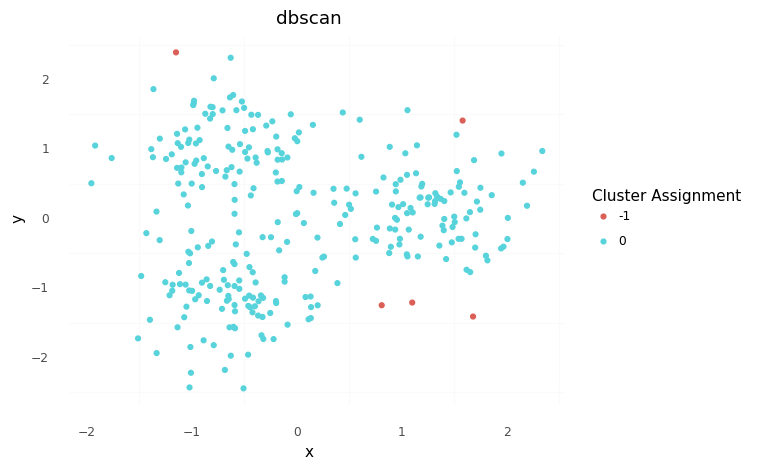

In [ ]:
# overall 
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

hac = AgglomerativeClustering(3)
km = KMeans(3)
gm = GaussianMixture(3)
dbscan = DBSCAN()

hac.fit(d2[["x","y"]])
km.fit(d2[["x","y"]])
gm.fit(d2[["x","y"]])


d2["hac"] = hac.labels_
d2["km"] = km.labels_
d2["gm"] = gm.predict(d2[["x","y"]])
d2["dbscan"] = dbscan.fit_predict(d2[["x","y"]])


print(ggplot(d2, aes(x = "x", y = "y",
                    color = "factor(hac)")) +
             geom_point() +
             theme_minimal() +
             scale_color_discrete(name = "Cluster Assignment") +
             theme(panel_grid_major = element_blank()) + 
             labs(title = "Hierarchical Agglomeretive"))


print(ggplot(d2, aes(x = "x", y = "y",
                    color = "factor(km)")) +
             geom_point() +
             theme_minimal() +
             scale_color_discrete(name = "Cluster Assignment") +
             theme(panel_grid_major = element_blank()) + 
             labs(title = "KMeans"))


print(ggplot(d2, aes(x = "x", y = "y",
                    color = "factor(gm)")) +
             geom_point() +
             theme_minimal() +
             scale_color_discrete(name = "Cluster Assignment") +
             theme(panel_grid_major = element_blank()) + 
             labs(title = "Gaussian Mixtures"))


print(ggplot(d2, aes(x = "x", y = "y",
                    color = "factor(dbscan)")) +
             geom_point() +
             theme_minimal() +
             scale_color_discrete(name = "Cluster Assignment") +
             theme(panel_grid_major = element_blank()) + 
             labs(title = "dbscan"))

In [ ]:
print("The silhouette_score for Gaussian is", silhouette_score(d2, gm.predict(d2[["x","y"]])))

The silhouette_score for Gaussian is 0.6931719093603064


The best model is Gaussian with score 0.6931719093603064

## Dataset 3

In [ ]:
d3 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KMEM3.csv")

In [ ]:
d3.describe()

,x,y
count,3.000000e+02,3.000000e+02
mean,-6.631732e-16,-1.184238e-16
std,1.000000e+00,1.000000e+00
min,-9.508814e-01,-1.578358e+00
25%,-7.382357e-01,-1.213797e+00
50%,-6.421182e-01,1.567173e-01
75%,1.333571e+00,1.049263e+00
max,1.667365e+00,1.439484e+00


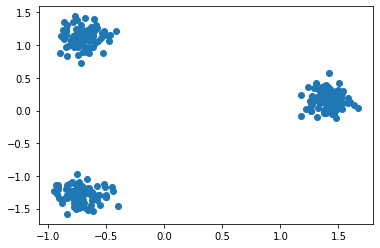

In [ ]:
d3_std = scaler.fit_transform(d3)
plt.scatter(d3_std[:,0], d3_std[:,1])

The silhouette_score for dbscan is 0.913619050733588


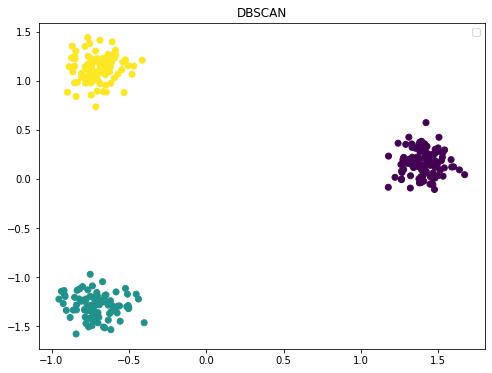

In [ ]:
# dbscan and plot
dbscan = DBSCAN(eps = 0.5, min_samples= 5)
labels = dbscan.fit_predict(d3_std)

print("The silhouette_score for dbscan is", silhouette_score(d3_std, labels))
plt.figure(figsize= (8,6))
plt.scatter(d3_std[:,0], d3_std[:,1], c = labels )
plt.legend()
plt.title('DBSCAN')
plt.show()

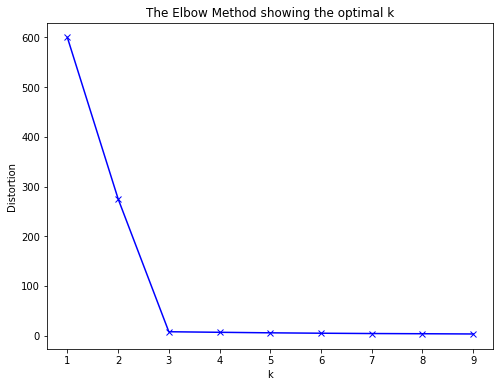

In [ ]:
distortions = []
K = range(1,10)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(d3_std)
    distortions.append(kmeans.inertia_)

plt.figure(figsize=(8,6))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

The silhouette_score for kmeans is 0.913619050733588


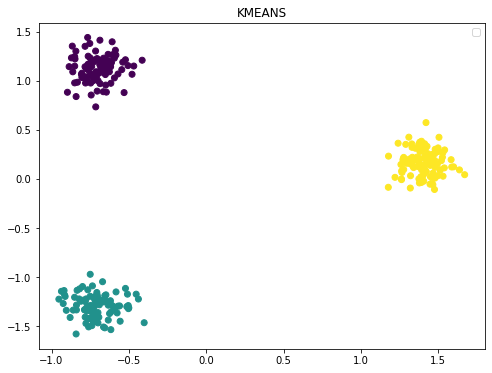

In [ ]:
# grab only clustered data points
kmeans = KMeans(3)
labels = kmeans.fit_predict(d3_std)

print("The silhouette_score for kmeans is", silhouette_score(d3_std, labels))

plt.figure(figsize= (8,6))
plt.scatter(d3_std[:,0], d3_std[:,1], c = labels )
plt.legend()
plt.title('KMEANS')
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering

ward = AgglomerativeClustering(n_clusters=3)
ward_pred = ward.fit_predict(d3_std)

# Hierarchical clustering using complete linkage
complete = AgglomerativeClustering(n_clusters=3, linkage = 'complete')
complete_pred = complete.fit_predict(d3_std)

# Hierarchical clustering using average linkage
avg = AgglomerativeClustering(n_clusters=3, linkage = 'average')
avg_pred = avg.fit_predict(d3_std)

print("The silhouette_score for ward is", silhouette_score(d3_std, ward_pred))
print("The silhouette_score for complete linkage is", silhouette_score(d3_std, complete_pred))
print("The silhouette_score for average linkage is", silhouette_score(d3_std, avg_pred))


The silhouette_score for ward is 0.913619050733588
The silhouette_score for complete linkage is 0.913619050733588
The silhouette_score for average linkage is 0.913619050733588


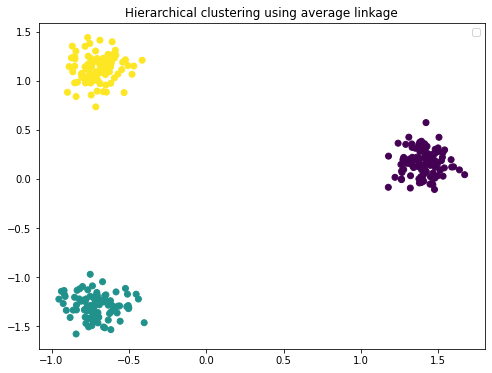

In [ ]:
plt.figure(figsize= (8,6))
plt.scatter(d3_std[:,0], d3_std[:,1], c = avg_pred )
plt.legend()
plt.title('Hierarchical clustering using average linkage')
plt.show()

In [ ]:
# grab only clustered data points

# overall 


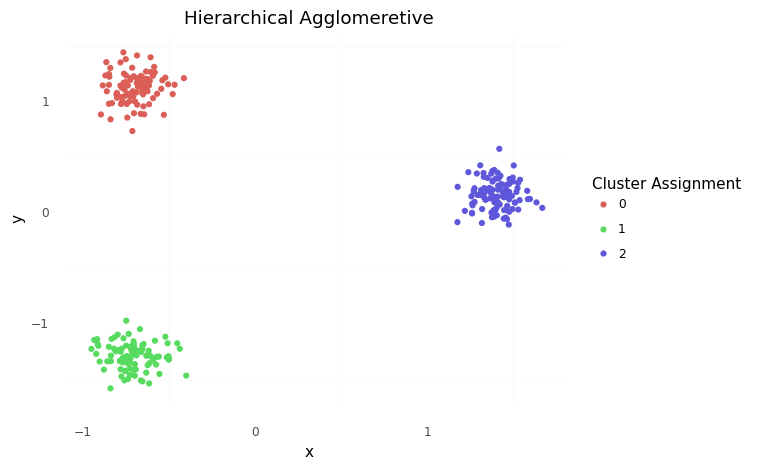

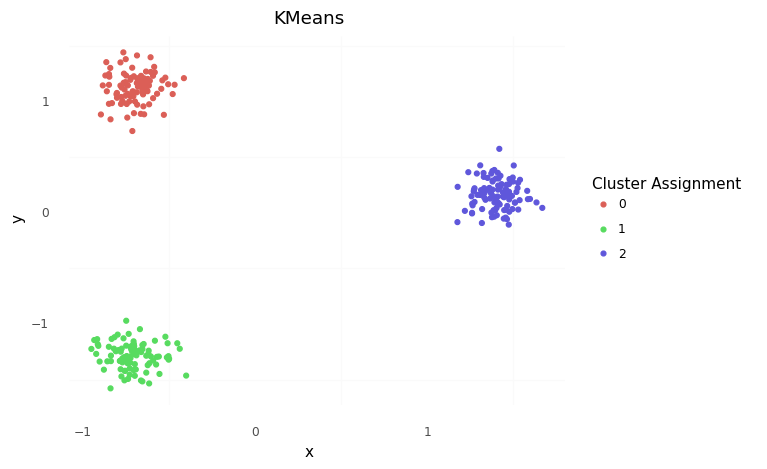

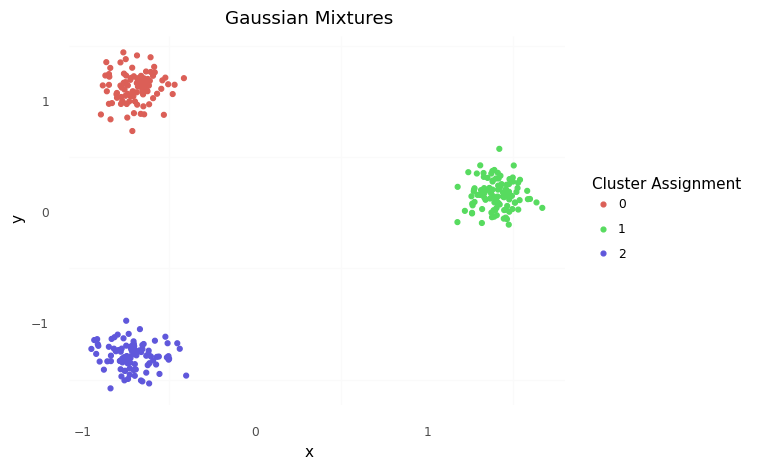

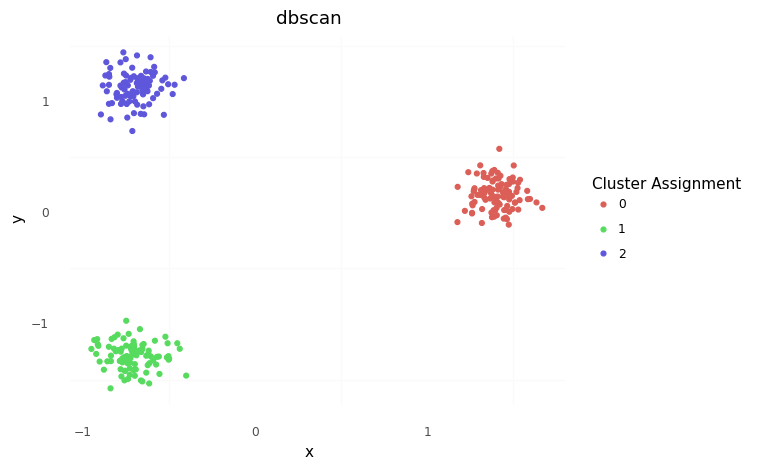

In [ ]:
# overall 
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

hac = AgglomerativeClustering(3)
km = KMeans(3)
gm = GaussianMixture(3)
dbscan = DBSCAN()

hac.fit(d3[["x","y"]])
km.fit(d3[["x","y"]])
gm.fit(d3[["x","y"]])


d3["hac"] = hac.labels_
d3["km"] = km.labels_
d3["gm"] = gm.predict(d3[["x","y"]])
d3["dbscan"] = dbscan.fit_predict(d3[["x","y"]])


print(ggplot(d3, aes(x = "x", y = "y",
                    color = "factor(hac)")) +
             geom_point() +
             theme_minimal() +
             scale_color_discrete(name = "Cluster Assignment") +
             theme(panel_grid_major = element_blank()) + 
             labs(title = "Hierarchical Agglomeretive"))


print(ggplot(d3, aes(x = "x", y = "y",
                    color = "factor(km)")) +
             geom_point() +
             theme_minimal() +
             scale_color_discrete(name = "Cluster Assignment") +
             theme(panel_grid_major = element_blank()) + 
             labs(title = "KMeans"))


print(ggplot(d3, aes(x = "x", y = "y",
                    color = "factor(gm)")) +
             geom_point() +
             theme_minimal() +
             scale_color_discrete(name = "Cluster Assignment") +
             theme(panel_grid_major = element_blank()) + 
             labs(title = "Gaussian Mixtures"))


print(ggplot(d3, aes(x = "x", y = "y",
                    color = "factor(dbscan)")) +
             geom_point() +
             theme_minimal() +
             scale_color_discrete(name = "Cluster Assignment") +
             theme(panel_grid_major = element_blank()) + 
             labs(title = "dbscan"))

In [ ]:
print("The silhouette_score for Gaussian is", silhouette_score(d3, gm.predict(d3[["x","y"]])))

The silhouette_score for Gaussian is 0.9399216312707822


The best model is Gaussian with score 0.9399216312707822

## Dataset 4

In [ ]:
d4 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KMEM4.csv")

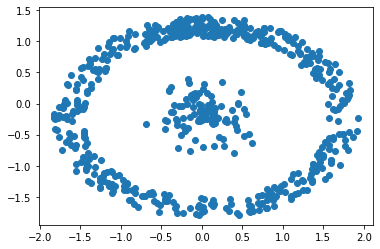

In [ ]:
d4_std = scaler.fit_transform(d4)
plt.scatter(d4_std[:,0], d4_std[:,1])

The silhouette_score for dbscan is -0.042911477754913246


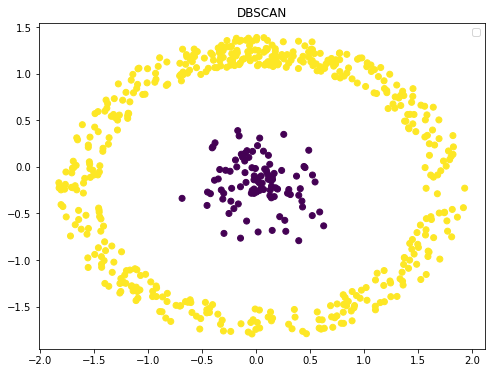

In [ ]:
# dbscan and plot
dbscan = DBSCAN(eps = .5, min_samples= 4)
labels = dbscan.fit_predict(d4_std)

print("The silhouette_score for dbscan is", silhouette_score(d4_std, labels))
plt.figure(figsize= (8,6))
plt.scatter(d4_std[:,0], d4_std[:,1], c = labels )
plt.legend()
plt.title('DBSCAN')
plt.show()

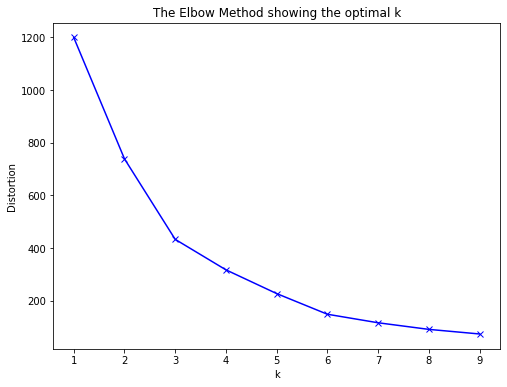

In [ ]:
distortions = []
K = range(1,10)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(d4_std)
    distortions.append(kmeans.inertia_)

plt.figure(figsize=(8,6))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

The silhouette_score for kmeans is 0.37428500782082524


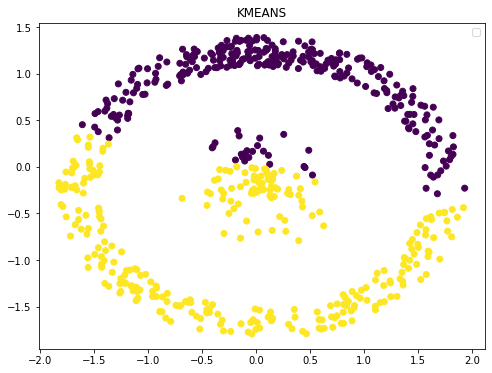

In [ ]:
# grab only clustered data points
kmeans = KMeans(2)
labels = kmeans.fit_predict(d4_std)

print("The silhouette_score for kmeans is", silhouette_score(d4_std, labels))

plt.figure(figsize= (8,6))
plt.scatter(d4_std[:,0], d4_std[:,1], c = labels )
plt.legend()
plt.title('KMEANS')
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering

single = AgglomerativeClustering(n_clusters=2, linkage = 'single')
single_pred = single.fit_predict(d4_std)

ward = AgglomerativeClustering(n_clusters=2)
ward_pred = ward.fit_predict(d4_std)

# Hierarchical clustering using complete linkage
complete = AgglomerativeClustering(n_clusters=2, linkage = 'complete')
complete_pred = complete.fit_predict(d4_std)

# Hierarchical clustering using average linkage
avg = AgglomerativeClustering(n_clusters=2, linkage = 'average')
avg_pred = avg.fit_predict(d4_std)

print("The silhouette_score for single is", silhouette_score(d4_std, single_pred))
print("The silhouette_score for ward is", silhouette_score(d4_std, ward_pred))
print("The silhouette_score for complete linkage is", silhouette_score(d4_std, complete_pred))
print("The silhouette_score for average linkage is", silhouette_score(d4_std, avg_pred))


The silhouette_score for single is -0.042911477754913246
The silhouette_score for ward is 0.360199832511491
The silhouette_score for complete linkage is 0.3370934309704101
The silhouette_score for average linkage is 0.360199832511491


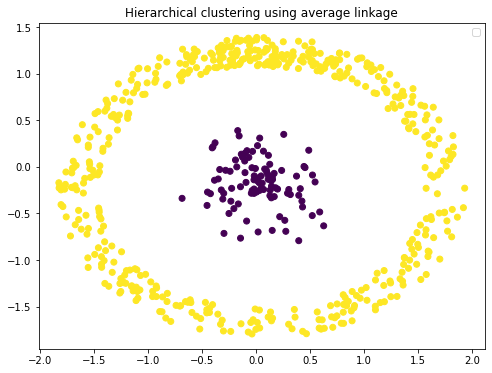

In [ ]:
plt.figure(figsize= (8,6))
plt.scatter(d4_std[:,0], d4_std[:,1], c = single_pred )
plt.legend()
plt.title('Hierarchical clustering using average linkage')
plt.show()

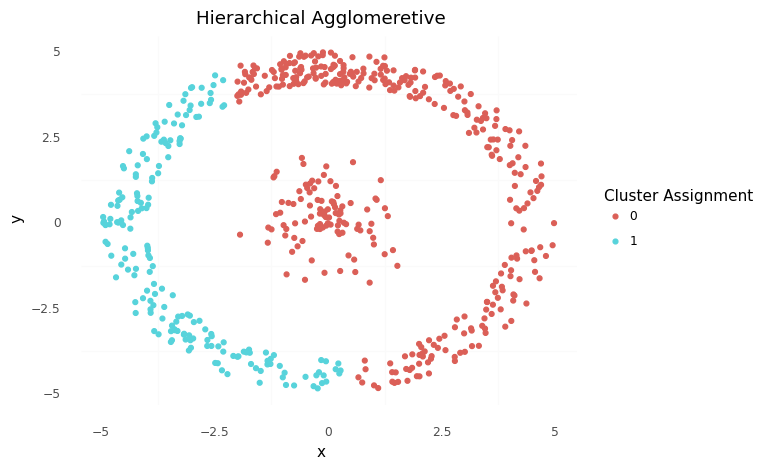

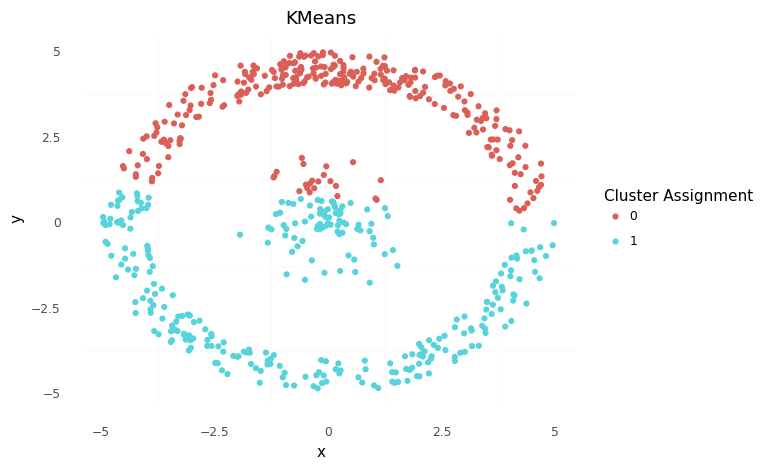

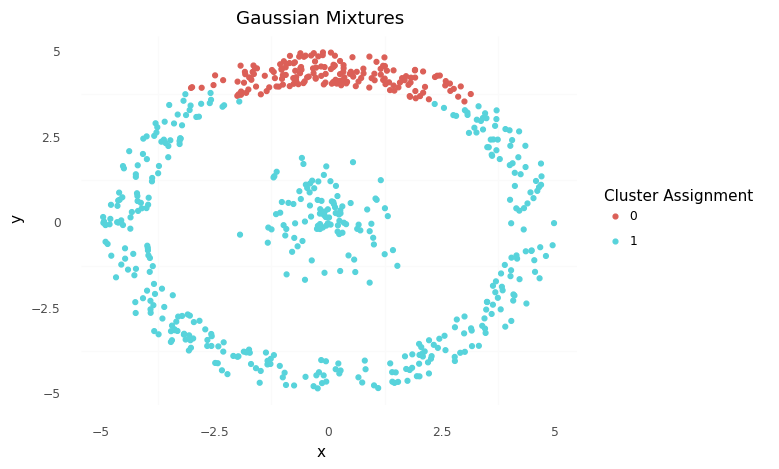

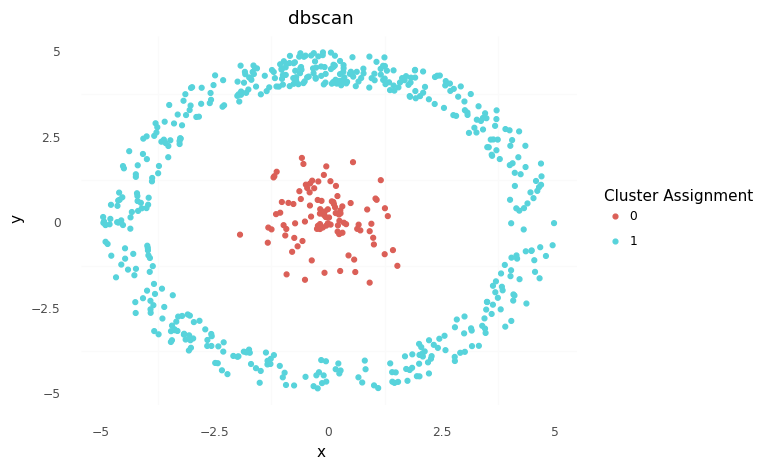

In [ ]:
# grab only clustered data points

# overall 

# overall 
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

hac = AgglomerativeClustering(2)
km = KMeans(2)
gm = GaussianMixture(2)
dbscan = DBSCAN(eps = .7, min_samples= 5)

hac.fit(d4[["x","y"]])
km.fit(d4[["x","y"]])
gm.fit(d4[["x","y"]])


d4["hac"] = hac.labels_
d4["km"] = km.labels_
d4["gm"] = gm.predict(d4[["x","y"]])
d4["dbscan"] = dbscan.fit_predict(d4[["x","y"]])


print(ggplot(d4, aes(x = "x", y = "y",
                    color = "factor(hac)")) +
             geom_point() +
             theme_minimal() +
             scale_color_discrete(name = "Cluster Assignment") +
             theme(panel_grid_major = element_blank()) + 
             labs(title = "Hierarchical Agglomeretive"))


print(ggplot(d4, aes(x = "x", y = "y",
                    color = "factor(km)")) +
             geom_point() +
             theme_minimal() +
             scale_color_discrete(name = "Cluster Assignment") +
             theme(panel_grid_major = element_blank()) + 
             labs(title = "KMeans"))


print(ggplot(d4, aes(x = "x", y = "y",
                    color = "factor(gm)")) +
             geom_point() +
             theme_minimal() +
             scale_color_discrete(name = "Cluster Assignment") +
             theme(panel_grid_major = element_blank()) + 
             labs(title = "Gaussian Mixtures"))


print(ggplot(d4, aes(x = "x", y = "y",
                    color = "factor(dbscan)")) +
             geom_point() +
             theme_minimal() +
             scale_color_discrete(name = "Cluster Assignment") +
             theme(panel_grid_major = element_blank()) + 
             labs(title = "dbscan"))

In [ ]:
print("The silhouette_score for Gaussian is", silhouette_score(d4, gm.predict(d4[["x","y"]])))

The silhouette_score for Gaussian is 0.3210488844107223


In [ ]:
# grab only clustered data points

# overall 


### Compare

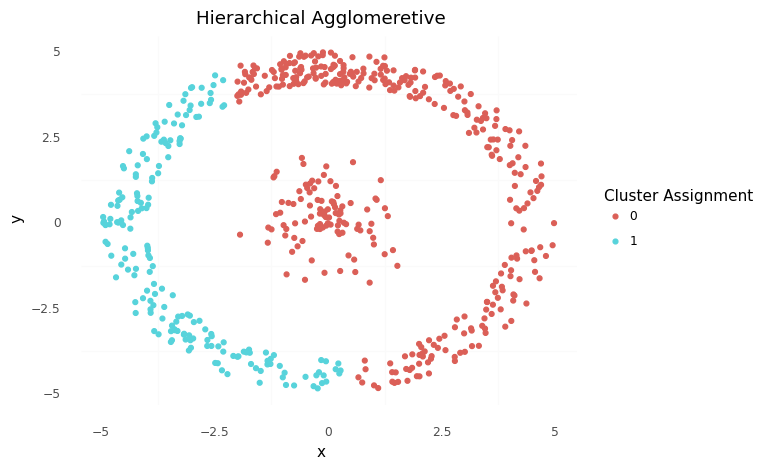

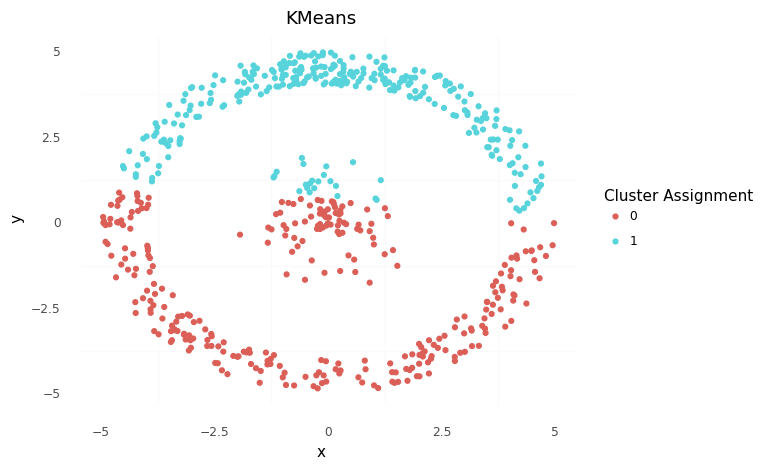

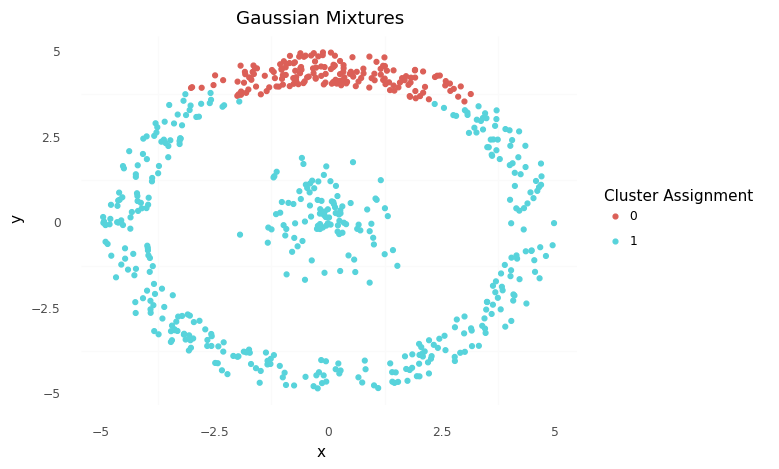

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

hac = AgglomerativeClustering(2)
km = KMeans(2)
gm = GaussianMixture(2)

hac.fit(d4[["x","y"]])
km.fit(d4[["x","y"]])
gm.fit(d4[["x","y"]])

d4["hac"] = hac.labels_
d4["km"] = km.labels_
d4["gm"] = gm.predict(d4[["x","y"]])


print(ggplot(d4, aes(x = "x", y = "y",
                    color = "factor(hac)")) +
             geom_point() +
             theme_minimal() +
             scale_color_discrete(name = "Cluster Assignment") +
             theme(panel_grid_major = element_blank()) + 
             labs(title = "Hierarchical Agglomeretive"))


print(ggplot(d4, aes(x = "x", y = "y",
                    color = "factor(km)")) +
             geom_point() +
             theme_minimal() +
             scale_color_discrete(name = "Cluster Assignment") +
             theme(panel_grid_major = element_blank()) + 
             labs(title = "KMeans"))


print(ggplot(d4, aes(x = "x", y = "y",
                    color = "factor(gm)")) +
             geom_point() +
             theme_minimal() +
             scale_color_discrete(name = "Cluster Assignment") +
             theme(panel_grid_major = element_blank()) + 
             labs(title = "Gaussian Mixtures"))

## Dataset 5

In [ ]:
d5 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KMEM5.csv")


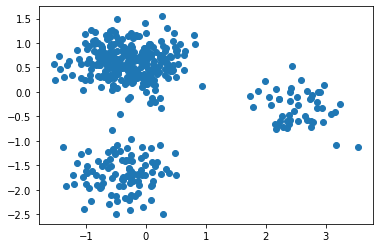

In [ ]:
d5_std = scaler.fit_transform(d5)
plt.scatter(d5_std[:,0], d5_std[:,1])

The silhouette_score for dbscan is 0.6714107830551044


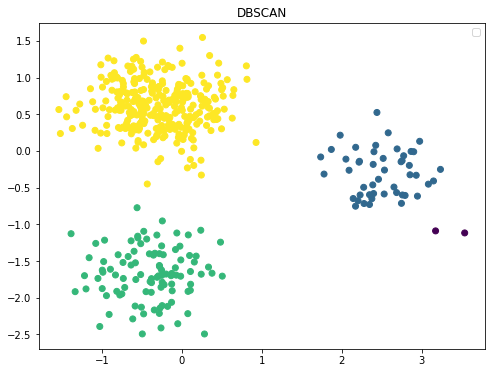

In [ ]:
# dbscan and plot
dbscan = DBSCAN(eps = 0.5, min_samples= 15)
labels = dbscan.fit_predict(d5_std)

print("The silhouette_score for dbscan is", silhouette_score(d5_std, labels))
plt.figure(figsize= (8,6))
plt.scatter(d5_std[:,0], d5_std[:,1], c = labels )
plt.legend()
plt.title('DBSCAN')
plt.show()

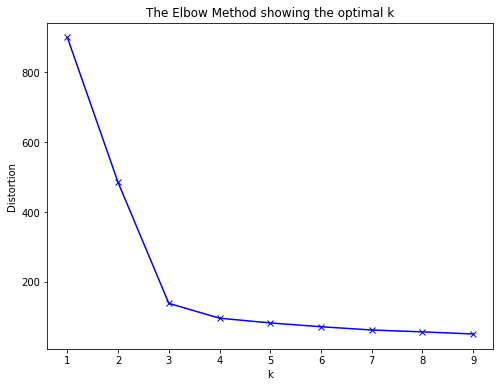

In [ ]:
distortions = []
K = range(1,10)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(d5_std)
    distortions.append(kmeans.inertia_)

plt.figure(figsize=(8,6))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

The silhouette_score for kmeans is 0.7043537508086658


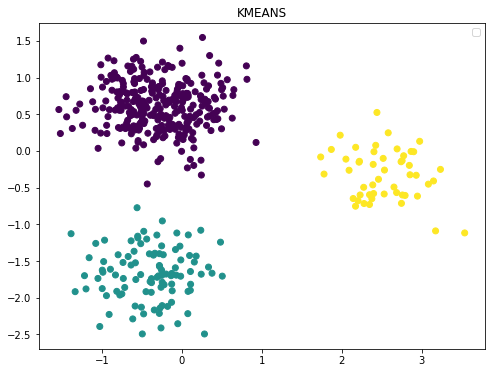

In [ ]:
# grab only clustered data points
kmeans = KMeans(3)
labels = kmeans.fit_predict(d5_std)

print("The silhouette_score for kmeans is", silhouette_score(d5_std, labels))

plt.figure(figsize= (8,6))
plt.scatter(d5_std[:,0], d5_std[:,1], c = labels )
plt.legend()
plt.title('KMEANS')
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering

ward = AgglomerativeClustering(n_clusters=3)
ward_pred = ward.fit_predict(d5_std)

# Hierarchical clustering using complete linkage
complete = AgglomerativeClustering(n_clusters=3, linkage = 'complete')
complete_pred = complete.fit_predict(d5_std)

# Hierarchical clustering using average linkage
avg = AgglomerativeClustering(n_clusters=3, linkage = 'average')
avg_pred = avg.fit_predict(d5_std)

print("The silhouette_score for ward is", silhouette_score(d5_std, ward_pred))
print("The silhouette_score for complete linkage is", silhouette_score(d5_std, complete_pred))
print("The silhouette_score for average linkage is", silhouette_score(d5_std, avg_pred))


The silhouette_score for ward is 0.7031189213721805
The silhouette_score for complete linkage is 0.7029935801381054
The silhouette_score for average linkage is 0.7031189213721805


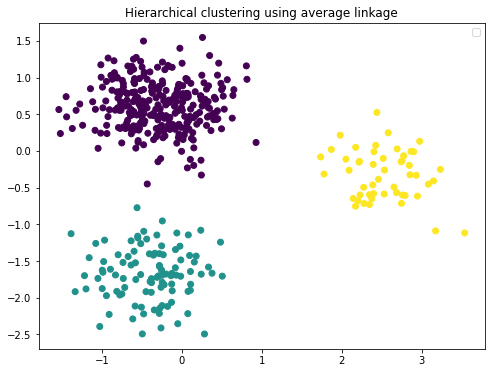

In [ ]:
plt.figure(figsize= (8,6))
plt.scatter(d5_std[:,0], d5_std[:,1], c = labels )
plt.legend()
plt.title('Hierarchical clustering using average linkage')
plt.show()

The best model is kmeans with score 0.7043537508086658

### Compare

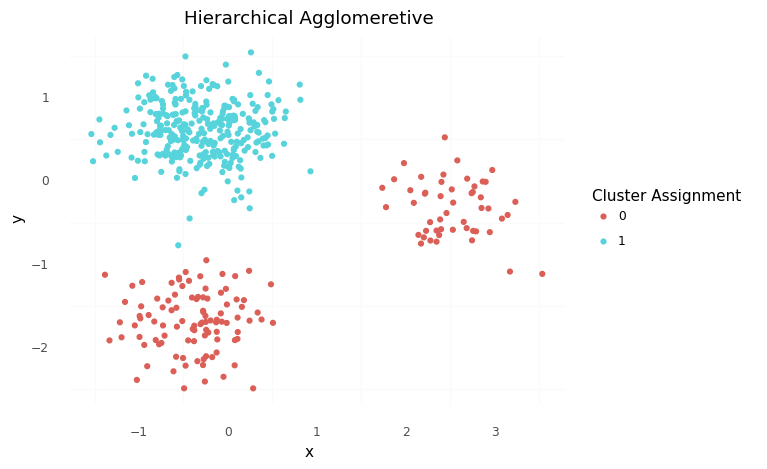

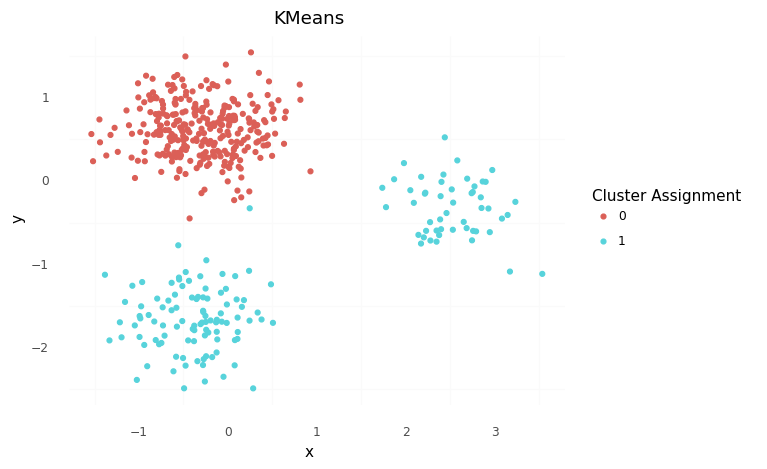

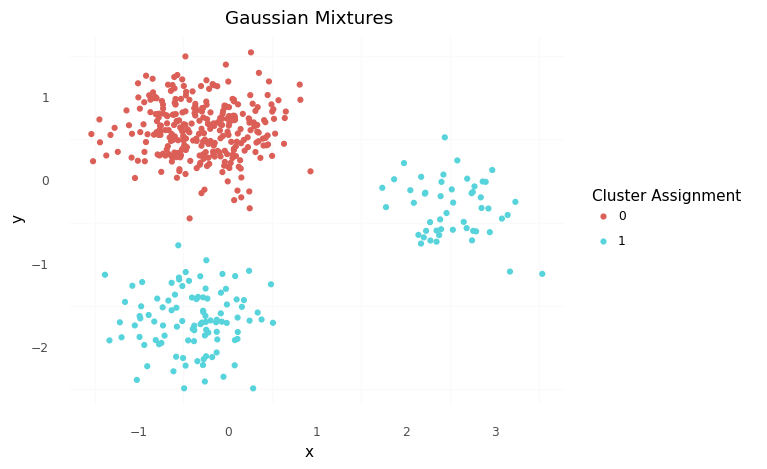

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

hac = AgglomerativeClustering(2)
km = KMeans(2)
gm = GaussianMixture(2)

hac.fit(d5[["x","y"]])
km.fit(d5[["x","y"]])
gm.fit(d5[["x","y"]])

d5["hac"] = hac.labels_
d5["km"] = km.labels_
d5["gm"] = gm.predict(d5[["x","y"]])


print(ggplot(d5, aes(x = "x", y = "y",
                    color = "factor(hac)")) +
             geom_point() +
             theme_minimal() +
             scale_color_discrete(name = "Cluster Assignment") +
             theme(panel_grid_major = element_blank()) + 
             labs(title = "Hierarchical Agglomeretive"))


print(ggplot(d5, aes(x = "x", y = "y",
                    color = "factor(km)")) +
             geom_point() +
             theme_minimal() +
             scale_color_discrete(name = "Cluster Assignment") +
             theme(panel_grid_major = element_blank()) + 
             labs(title = "KMeans"))


print(ggplot(d5, aes(x = "x", y = "y",
                    color = "factor(gm)")) +
             geom_point() +
             theme_minimal() +
             scale_color_discrete(name = "Cluster Assignment") +
             theme(panel_grid_major = element_blank()) + 
             labs(title = "Gaussian Mixtures"))

In [ ]:
print("The silhouette_score for Gaussian is", silhouette_score(d5, gm.predict(d5[["x","y"]])))

The silhouette_score for Gaussian is 0.653377797736953


The best model is kmeans with score 0.7043537508086658

# Elbow Method

Read more [here](https://iopscience.iop.org/article/10.1088/1755-1315/31/1/012012/pdf) if math excites you.

## Dataset 6

In [ ]:
d6 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KMEM6.csv")

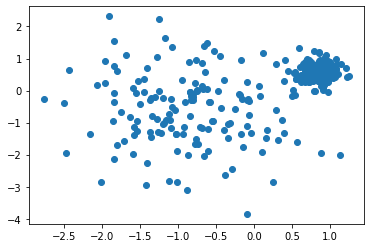

In [ ]:
d6_std = scaler.fit_transform(d6)
plt.scatter(d6_std[:,0], d6_std[:,1])

The silhouette_score for dbscan is 0.5347478827475796


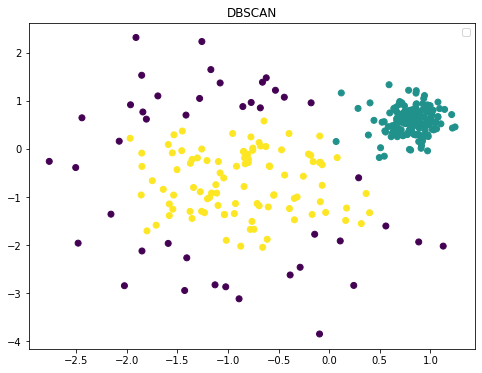

In [ ]:
# dbscan and plot
dbscan = DBSCAN(eps = 0.4, min_samples= 8)
labels = dbscan.fit_predict(d6_std)

print("The silhouette_score for dbscan is", silhouette_score(d6_std, labels))
plt.figure(figsize= (8,6))
plt.scatter(d6_std[:,0], d6_std[:,1], c = labels )
plt.legend()
plt.title('DBSCAN')
plt.show()

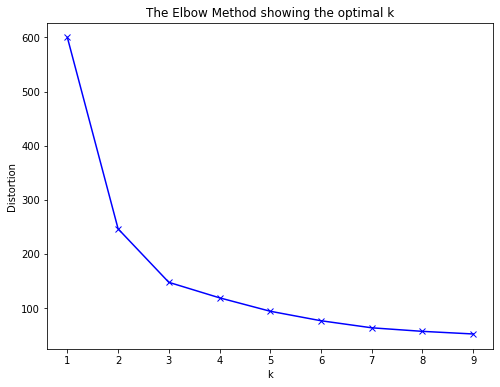

In [ ]:
distortions = []
K = range(1,10)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(d6_std)
    distortions.append(kmeans.inertia_)

plt.figure(figsize=(8,6))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

The silhouette_score for kmeans is 0.5861497443577426


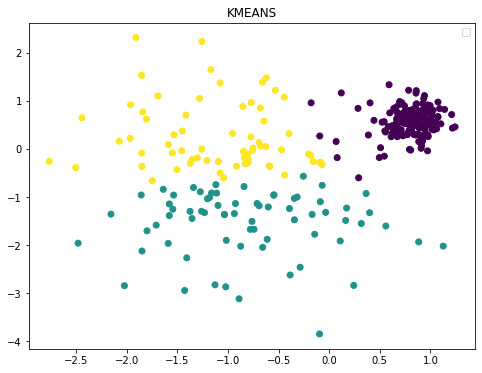

In [ ]:
# grab only clustered data points
kmeans = KMeans(3)
labels = kmeans.fit_predict(d6_std)

print("The silhouette_score for kmeans is", silhouette_score(d6_std, labels))

plt.figure(figsize= (8,6))
plt.scatter(d6_std[:,0], d6_std[:,1], c = labels )
plt.legend()
plt.title('KMEANS')
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering

ward = AgglomerativeClustering(n_clusters=2)
ward_pred = ward.fit_predict(d6_std)

# Hierarchical clustering using complete linkage
complete = AgglomerativeClustering(n_clusters=2, linkage = 'complete')
complete_pred = complete.fit_predict(d6_std)

# Hierarchical clustering using average linkage
avg = AgglomerativeClustering(n_clusters=2, linkage = 'average')
avg_pred = avg.fit_predict(d6_std)

print("The silhouette_score for ward is", silhouette_score(d6_std, ward_pred))
print("The silhouette_score for complete linkage is", silhouette_score(d6_std, complete_pred))
print("The silhouette_score for average linkage is", silhouette_score(d6_std, avg_pred))


The silhouette_score for ward is 0.5538801329572542
The silhouette_score for complete linkage is 0.4749194904758387
The silhouette_score for average linkage is 0.4558377093916933


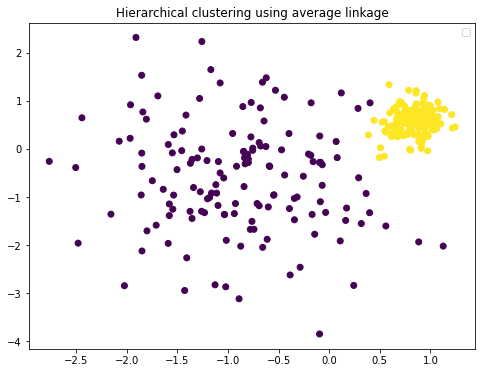

In [ ]:
plt.figure(figsize= (8,6))
plt.scatter(d6_std[:,0], d6_std[:,1], c = ward_pred )
plt.legend()
plt.title('Hierarchical clustering using average linkage')
plt.show()

In [ ]:
print("The silhouette_score for Gaussian is", silhouette_score(d6, gm.predict(d6[["x","y"]])))

The silhouette_score for Gaussian is 0.6340626131396672


In [ ]:
# grab only clustered data points

# overall 


In [ ]:
# grab only clustered data points

# overall 


### Compare

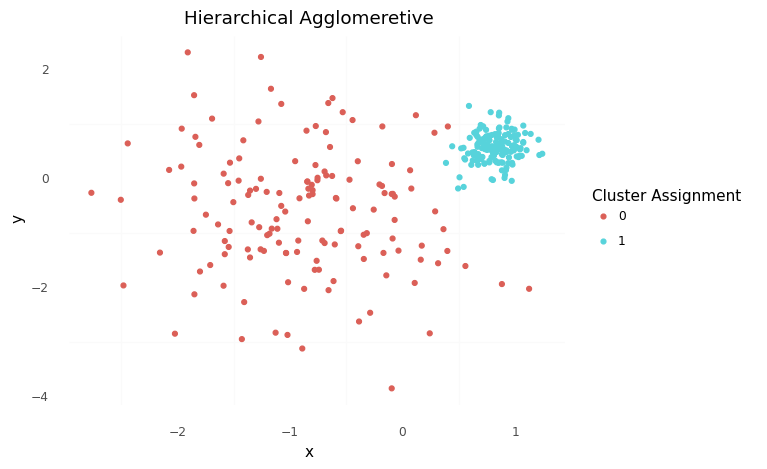

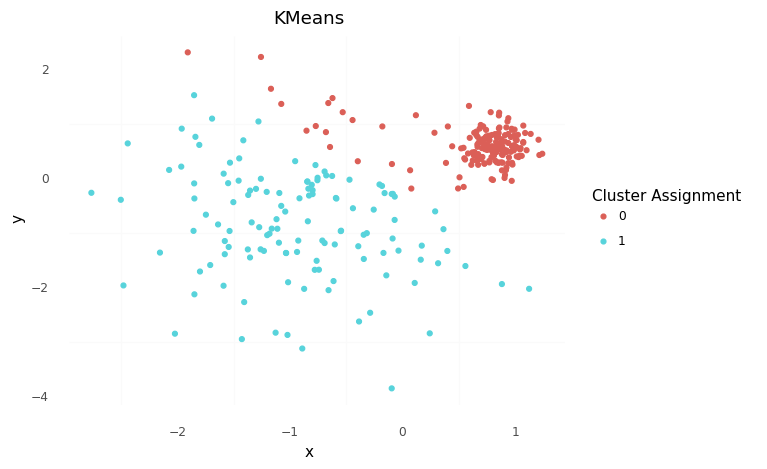

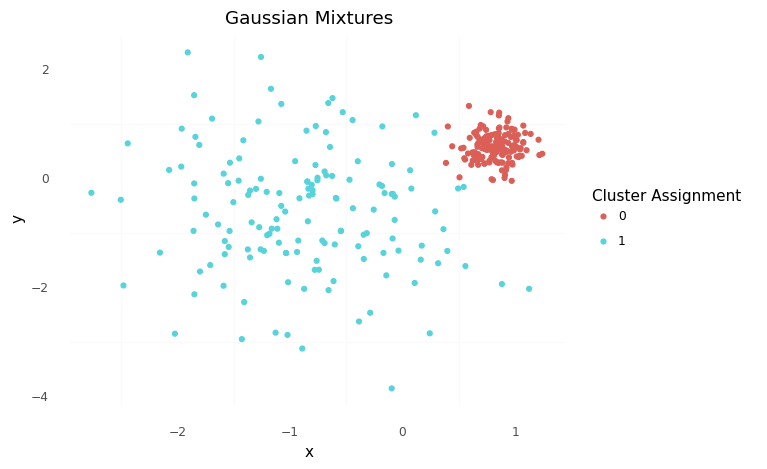

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

hac = AgglomerativeClustering(2)
km = KMeans(2)
gm = GaussianMixture(2)

hac.fit(d6[["x","y"]])
km.fit(d6[["x","y"]])
gm.fit(d6[["x","y"]])

d6["hac"] = hac.labels_
d6["km"] = km.labels_
d6["gm"] = gm.predict(d6[["x","y"]])


print(ggplot(d6, aes(x = "x", y = "y",
                    color = "factor(hac)")) +
             geom_point() +
             theme_minimal() +
             scale_color_discrete(name = "Cluster Assignment") +
             theme(panel_grid_major = element_blank()) + 
             labs(title = "Hierarchical Agglomeretive"))


print(ggplot(d6, aes(x = "x", y = "y",
                    color = "factor(km)")) +
             geom_point() +
             theme_minimal() +
             scale_color_discrete(name = "Cluster Assignment") +
             theme(panel_grid_major = element_blank()) + 
             labs(title = "KMeans"))


print(ggplot(d6, aes(x = "x", y = "y",
                    color = "factor(gm)")) +
             geom_point() +
             theme_minimal() +
             scale_color_discrete(name = "Cluster Assignment") +
             theme(panel_grid_major = element_blank()) + 
             labs(title = "Gaussian Mixtures"))

In [ ]:
print("The silhouette_score for Gaussian is", silhouette_score(d6, gm.predict(d6[["x","y"]])))

The silhouette_score for Gaussian is 0.6340626131396672


The best model is Gaussian with score 0.6340626131396672